In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
#cleaned
eng_path = "../../data/team_player/cleaned/EPL.csv"
it_path = "../../data/team_player/cleaned/SerieA.csv"
spain_path = "../../data/team_player/cleaned/Liga.csv"

#read the cleaned data
eng_df = pd.read_csv(eng_path)
it_df = pd.read_csv(it_path)
spain_df = pd.read_csv(spain_path)
eng_df.head(10)

Ranking  Year                    Teams  Points  Goals+  Goals-  avg age  \
0        1  2019                Liverpool      99      85      33    24.48   
1        2  2019          Manchester City      81     102      35    24.33   
2        3  2019        Manchester United      66      66      36    24.82   
3        4  2019                  Chelsea      66      69      54    24.76   
4        5  2019           Leicester City      62      67      41    25.52   
5        6  2019        Tottenham Hotspur      59      61      47    23.88   
6        7  2019  Wolverhampton Wanderers      59      51      40    23.76   
7        8  2019                  Arsenal      56      56      48    23.85   
8        9  2019                  Burnley      54      43      50    26.09   
9       10  2019         Sheffield United      54      39      39    26.21   

   avg heights (cm)  avg weight (kg)  avg player rating  \
0            181.21            73.39              75.85   
1            179.82            72.97              77.00   
2            183.55            74.97              76.85   
3            183.18            79.00              77.06   
4            181.42            76.88              74.36   
5            181.79            76.85              76.48   
6            183.36            77.82              70.45   
7            182.48            75.76              75.06   
8            182.88            77.85              71.30   
9            182.58            76.39              68.88   

   avg player value (EU)  avg player wage  
0               21008030            80818  
1               25628636           120727  
2               15202272            87091  
3               15302121            85030  
4                8232575            53000  
5               19692424            78879  
6                7016666            41970  
7               13783636            61394  
8                5392121            23939  
9                2932424            17909

In [2]:
#Preparation usefull dataframes
list_dfs = [eng_df,spain_df,it_df]
years=[2015,2016,2017,2018,2019]
list_year_eng=[]
list_year_it = []
list_year_spain = []
for year in years:
    list_year_eng.append(eng_df[eng_df["Year"]==year])
    list_year_it.append(it_df[it_df["Year"]==year])
    list_year_spain.append(spain_df[spain_df["Year"]==year])
eng_2015 = list_year_eng[0]
eng_2016 = list_year_eng[1]
eng_2017 = list_year_eng[2]
eng_2018 = list_year_eng[3]
eng_2019 = list_year_eng[4]
it_2015 = list_year_it[0]
it_2016 = list_year_it[1]
it_2017 = list_year_it[2]
it_2018 = list_year_it[3]
it_2019 = list_year_it[4]
spain_2015 = list_year_spain[0]
spain_2016 = list_year_spain[1]
spain_2017 = list_year_spain[2]
spain_2018 = list_year_spain[3]
spain_2019 = list_year_spain[4]
eng_top4 = eng_df[eng_df["Ranking"].isin(range(5))]
it_top4 = it_df[it_df["Ranking"].isin(range(5))]
spain_top4 = spain_df[spain_df["Ranking"].isin(range(5))]

In [3]:
#Evolution competitions 
#top 5 each comp
print("-------------------------------")
print("Top 4 teams per year in the EPL")
print("-------------------------------")
eng_top4

-------------------------------
Top 4 teams per year in the EPL
-------------------------------


Ranking  Year              Teams  Points  Goals+  Goals-  avg age  \
0          1  2019          Liverpool      99      85      33    24.48   
1          2  2019    Manchester City      81     102      35    24.33   
2          3  2019  Manchester United      66      66      36    24.82   
3          4  2019            Chelsea      66      69      54    24.76   
20         1  2018    Manchester City      98      57      12    24.09   
21         2  2018          Liverpool      97      55      10    24.00   
22         3  2018            Chelsea      72      39      12    25.21   
23         4  2018  Tottenham Hotspur      71      34      16    24.48   
40         1  2017    Manchester City     100      61      14    23.48   
41         2  2017  Manchester United      81      38       9    24.64   
42         3  2017  Tottenham Hotspur      77      40      16    23.39   
43         4  2017          Liverpool      75      45      10    24.09   
60         1  2016            Chelsea      93      55      17    24.27   
61         2  2016  Tottenham Hotspur      86      47       9    22.64   
62         3  2016    Manchester City      78      37      17    24.82   
63         4  2016          Liverpool      76      45      18    23.70   
80         1  2015     Leicester City      81      35      18    25.74   
81         2  2015            Arsenal      71      31      11    24.44   
82         3  2015  Tottenham Hotspur      70      35      15    22.77   
83         4  2015  Manchester United      66      27       9    24.70   
100        1  2014            Chelsea      87      36       9    23.76   
101        2  2014    Manchester City      79      44      14    25.48   
102        3  2014            Arsenal      75      41      14    23.82   
103        4  2014  Manchester United      70      41      15    23.94   

     avg heights (cm)  avg weight (kg)  avg player rating  \
0              181.21            73.39              75.85   
1              179.82            72.97              77.00   
2              183.55            74.97              76.85   
3              183.18            79.00              77.06   
20             180.45            74.12              76.85   
21             180.48            73.18              76.00   
22             182.82            77.00              76.79   
23             183.06            77.70              75.97   
40             181.67            74.15              74.12   
41             184.45            75.82              77.67   
42             183.18            78.03              73.52   
43             181.18            74.88              75.91   
60             183.18            77.12              75.55   
61             182.82            74.15              73.03   
62             180.67            73.85              75.55   
63             182.42            75.33              74.73   
80             180.65            74.87              69.39   
81             181.12            72.78              74.44   
82             182.13            74.17              72.73   
83             182.30            74.67              76.26   
100            183.42            77.30              73.27   
101            182.55            76.82              73.42   
102            181.21            73.00              74.18   
103            183.00            75.45              73.39   

     avg player value (EU)  avg player wage  
0                 21008030            80818  
1                 25628636           120727  
2                 15202272            87091  
3                 15302121            85030  
20                22951363           112758  
21                18015303            88212  
22                18798787            98970  
23                18203333            76606  
40                17536818            95667  
41                18503787           107788  
42                15938030            68788  
43                14128030            83394  
60                15741818    

In [4]:
eng_top4.iloc[:,2:].mean().round()

Points                         80.0
Goals+                         49.0
Goals-                         18.0
avg age                        24.0
avg heights (cm)              182.0
avg weight (kg)                75.0
avg player rating              75.0
avg player value (EU)    12970724.0
avg player wage             65559.0
dtype: float64

In [5]:
print("-------------------------------")
print("Top 4 teams per year in the Serie A")
print("-------------------------------")
it_top4

-------------------------------
Top 4 teams per year in the Serie A
-------------------------------


Ranking  Year                     Teams  Points  Goals+  Goals-  avg age  \
0          1  2019                  Juventus      83      76      43    27.00   
1          2  2019  FC Internazionale Milano      82      81      36    25.67   
2          3  2019                  SS Lazio      78      79      42    26.61   
3          4  2019                  Atalanta      78      98      48    25.68   
20         1  2018                  Juventus      90      39      13    27.16   
21         2  2018                    Napoli      79      41      16    25.92   
22         3  2018                  Atalanta      69      36      19    24.72   
23         4  2018  FC Internazionale Milano      69      27      10    27.46   
40         1  2017                  Juventus      95      45       8    27.77   
41         2  2017                    Napoli      91      43      18    26.07   
42         3  2017                   AS Roma      77      31      19    26.04   
43         4  2017  FC Internazionale Milano      72      37      16    25.96   
60         1  2016                  Juventus      91      48       9    27.33   
61         2  2016                   AS Roma      87      50      18    25.58   
62         3  2016                    Napoli      86      44      19    25.52   
63         4  2016                  Atalanta      72      31      18    26.24   
80         1  2015                  Juventus      91      37       6    26.31   
81         2  2015                    Napoli      82      49      12    25.73   
82         3  2015                   AS Roma      80      44      17    26.70   
83         4  2015  FC Internazionale Milano      67      29      15    25.18   
100        1  2014                  Juventus      87      45      11    26.06   
101        2  2014                   AS Roma      70      31      14    26.24   
102        3  2014                  SS Lazio      69      40      18    26.21   
103        4  2014            ACF Fiorentina      64      30      17    26.33   

     avg heights (cm)  avg weight (kg)  avg player rating  \
0              184.79            79.64              80.06   
1              182.33            76.03              75.67   
2              183.03            77.39              75.94   
3              184.89            79.64              73.79   
20             184.96            80.16              82.16   
21             180.80            74.28              79.84   
22             185.28            78.68              72.64   
23             182.83            76.96              79.71   
40             184.00            79.69              81.65   
41             180.48            74.30              77.67   
42             182.67            76.67              77.37   
43             183.75            76.29              76.67   
60             183.41            79.59              81.00   
61             181.62            75.23              76.19   
62             182.30            75.52              77.78   
63             184.28            78.45              72.00   
80             182.96            77.31              79.35   
81             182.62            76.08              76.65   
82             182.37            75.48              76.15   
83             181.93            76.89              75.43   
100            182.64            76.21              74.15   
101            182.09            75.61              73.45   
102            182.91            76.97              72.64   
103            183.42            77.61              73.00   

     avg player value (EU)  avg player wage  
0                 22287121           113636  
1                 14953666            53733  
2                 11658939            40455  
3                  8712321            38393  
20                27679000           130840  
21                19816000            70000  
22                 6632200            20880  
23                19418125            66792  
40                23734615           12

In [6]:
it_top4.iloc[:,2:].mean().round()

Points                         80.0
Goals+                         46.0
Goals-                         19.0
avg age                        26.0
avg heights (cm)              183.0
avg weight (kg)                77.0
avg player rating              77.0
avg player value (EU)    11921040.0
avg player wage             56145.0
dtype: float64

In [7]:
print("Top 4 teams per year in the Liga")
print("-------------------------------")
spain_top4

Top 4 teams per year in the Liga
-------------------------------


Ranking  Year            Teams  Points  Goals+  Goals-  avg age  \
0          1  2019      Real Madrid      87      70      25    24.91   
1          2  2019     FC Barcelona      82      86      38    24.06   
2          3  2019  Atlético Madrid      70      51      27    24.12   
3          4  2019       Sevilla FC      70      54      34    25.15   
20         1  2018     FC Barcelona      87      51      17    24.75   
21         2  2018  Atlético Madrid      76      32      10    23.79   
22         3  2018      Real Madrid      68      32      15    24.03   
23         4  2018      Valencia CF      61      24      12    23.39   
40         1  2017     FC Barcelona      93      53      11    26.25   
41         2  2017  Atlético Madrid      79      30       8    24.78   
42         3  2017      Real Madrid      76      54      20    24.58   
43         4  2017      Valencia CF      73      36      16    23.41   
60         1  2016      Real Madrid      93      48      20    24.09   
61         2  2016     FC Barcelona      90      64      17    23.88   
62         3  2016  Atlético Madrid      78      40      14    25.10   
63         4  2016       Sevilla FC      72      39      16    25.74   
80         1  2015     FC Barcelona      91      67      14    24.97   
81         2  2015      Real Madrid      90      70      16    23.81   
82         3  2015  Atlético Madrid      88      33       7    24.88   
83         4  2015    Villarreal CF      64      26      12    24.21   
100        1  2014     FC Barcelona      94      64      11    25.54   
101        2  2014      Real Madrid      92      65      15    23.79   
102        3  2014  Atlético Madrid      78      42      11    24.69   
103        4  2014      Valencia CF      77      42      10    22.71   

     avg heights (cm)  avg weight (kg)  avg player rating  \
0              180.21            75.85              80.12   
1              180.52            74.09              78.36   
2              181.79            75.88              76.18   
3              180.33            74.06              75.42   
20             179.75            74.36              80.29   
21             181.39            75.00              74.73   
22             181.21            75.64              77.85   
23             181.97            74.06              75.84   
40             179.83            75.12              82.38   
41             180.19            73.59              75.88   
42             180.42            74.00              81.04   
43             180.89            73.63              74.59   
60             180.79            74.79              78.55   
61             180.50            74.91              77.81   
62             181.28            74.07              77.45   
63             181.70            75.96              77.52   
80             179.10            74.10              78.59   
81             181.42            75.03              77.13   
82             181.48            74.16              76.92   
83             181.32            74.50              74.25   
100            178.12            71.92              79.75   
101            181.73            75.82              75.21   
102            181.28            75.10              74.45   
103            179.03            73.77              72.65   

     avg player value (EU)  avg player wage  
0                 27207575           162242  
1                 26342424           150000  
2                 17890151            44848  
3                 10095454            14939  
20                29925892           169536  
21                19432727            46333  
22                26668939           150333  
23                13846774            31097  
40                29791666           188833  
41                17692187            49406  
42                31798076           182731  
43                 8939814            29407  
60                23399242            82848  
61                21955468        

In [8]:
spain_top4.iloc[:,2:].mean().round()

Points                         80.0
Goals+                         49.0
Goals-                         16.0
avg age                        24.0
avg heights (cm)              181.0
avg weight (kg)                75.0
avg player rating              77.0
avg player value (EU)    16377948.0
avg player wage             77425.0
dtype: float64

In [9]:
def plot(list_df,column1,column2):
    leagues = ["Premier league","Liga", "Serie A"]
    count=1
    plt.figure(figsize=(20,8))
    plt.suptitle(f"{column1} vs {column2}",fontsize=20)
    
    for i,df in enumerate(list_df):
        plt.subplot(1,3,count)
        y_list = []
        df = df[(df[column1] != 0) & (df[column2] != 0)]
        for j,year in enumerate(sorted(list(df["Year"].unique()))):
            colors = ['blue','red','green','gold','magenta']
            #/ max columns 2 per year to normalise
            x = df[df["Year"]==year][column1]
            y = df[df["Year"]==year][column2]#/max(df[df["Year"]==year][column2])
            plt.scatter(x,y,label=year,c=colors[j],s=30)
            y_df = pd.DataFrame(y)
            y_list.append(y_df)
            
        y_series = pd.concat(y_list)

        ##to use when the data is not normalised
        plt.ylim(min(df[column2]),max(df[column2]))
        r = stats.pearsonr(df[column1],df[column2])[0]
        plt.annotate(f"r-squared : {round(r**2,2)}",(
              max(df[column1]-5),max(df[column2])),fontsize=14, color= "r")
        avg = round(df[column2].mean(),2)    
        plt.axhline(avg)
        plt.text(min(df[column1])-1,avg,f"{avg}",horizontalalignment='right',color="r")

        ##to use when the data is normalised
        # plt.ylim(0,1.1)
        # (m,b,r,p,sem) = stats.linregress(df[column1],y_series[column2])
        # plt.annotate(f"r-squared : {round(r**2,2)}",(max(df[column1]-5),1.1),fontsize=14, color= "r")
        # regress_values = m*df[column1] + b
        # plt.plot(df[column1],regress_values,c='b')
        # plt.annotate(f"y = {round(m,2)}x + {round(b,2)}",(max(df[column1]-6),0.1),c="r",fontsize=16)
        # print(f"---{leagues[i]}---")
        # print(f"Correlation = {round(r,2)}")
        # print(f"p-value = {p}")
        # print("----------------------------")

        plt.legend(loc="best")
        plt.xticks(np.arange(round(min(df[column1])),round(max(df[column1])+1)))
        plt.title(leagues[i], fontsize=14,color="b",pad=15)
        plt.tight_layout()
        count+=1
        
    #path = "../ouput_data/"
    #filename = f"{column1.replace(' ','_')}VS{column2.replace(' ','_')}.png"
    #f = open(path+filename,"w")
    #f.close()
    #plt.savefig(path+filename)

---Premier league---
Correlation = -0.74
p-value = 8.584249706733661e-19
----------------------------
---Liga---
Correlation = -0.66
p-value = 4.712773844794039e-14
----------------------------
---Serie A---
Correlation = -0.75
p-value = 1.5608344760746466e-19
----------------------------


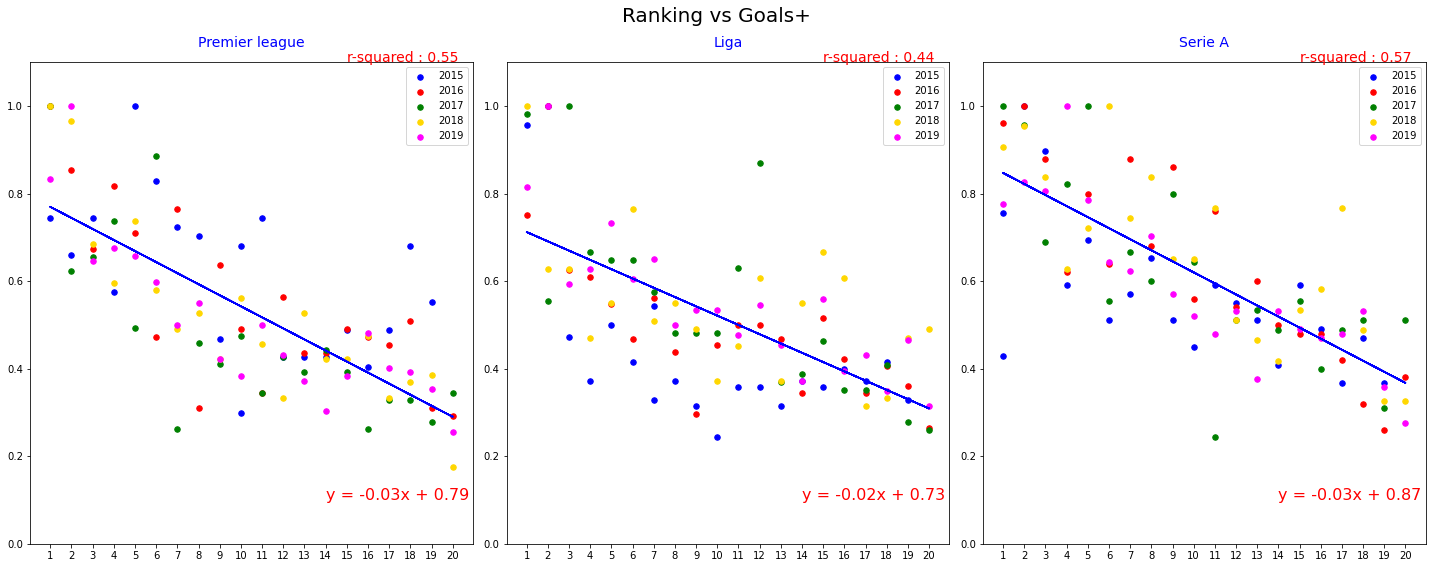

In [13]:
#normalised
plot(list_dfs,"Ranking","Goals+")

---Premier league---
Correlation = 0.78
p-value = 1.697759577579766e-21
----------------------------
---Liga---
Correlation = 0.69
p-value = 1.2095132701182372e-15
----------------------------
---Serie A---
Correlation = 0.76
p-value = 6.172602280639748e-20
----------------------------


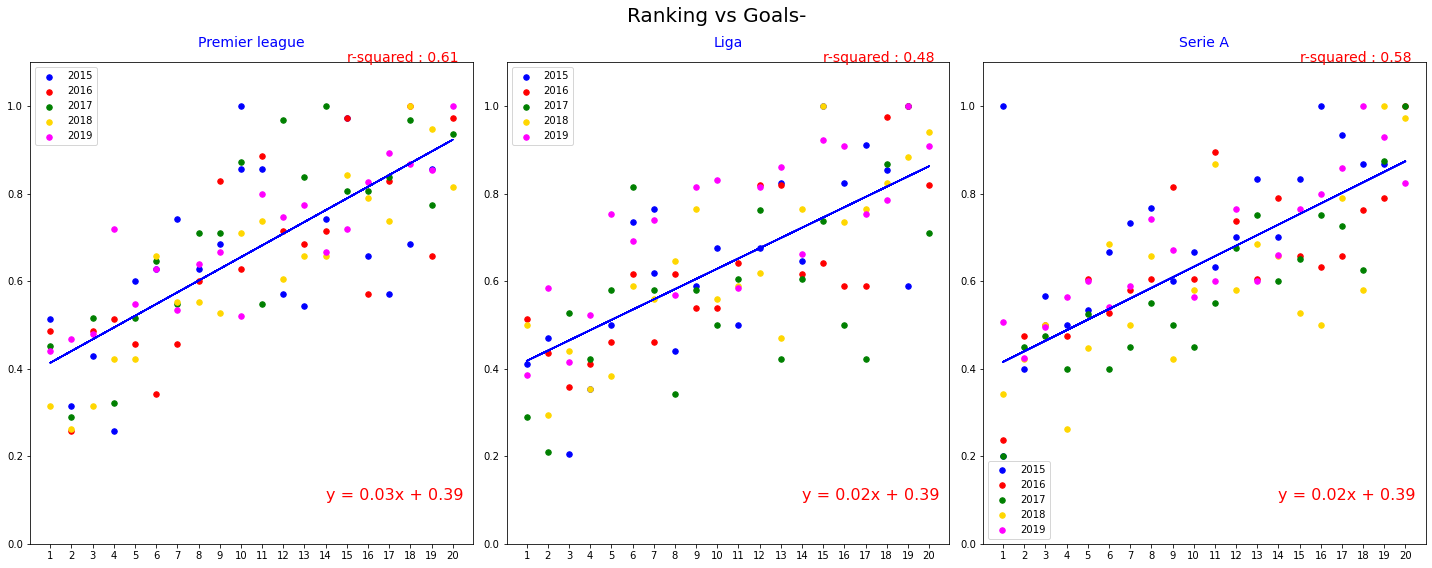

In [14]:
#normalised
plot(list_dfs,"Ranking","Goals-")

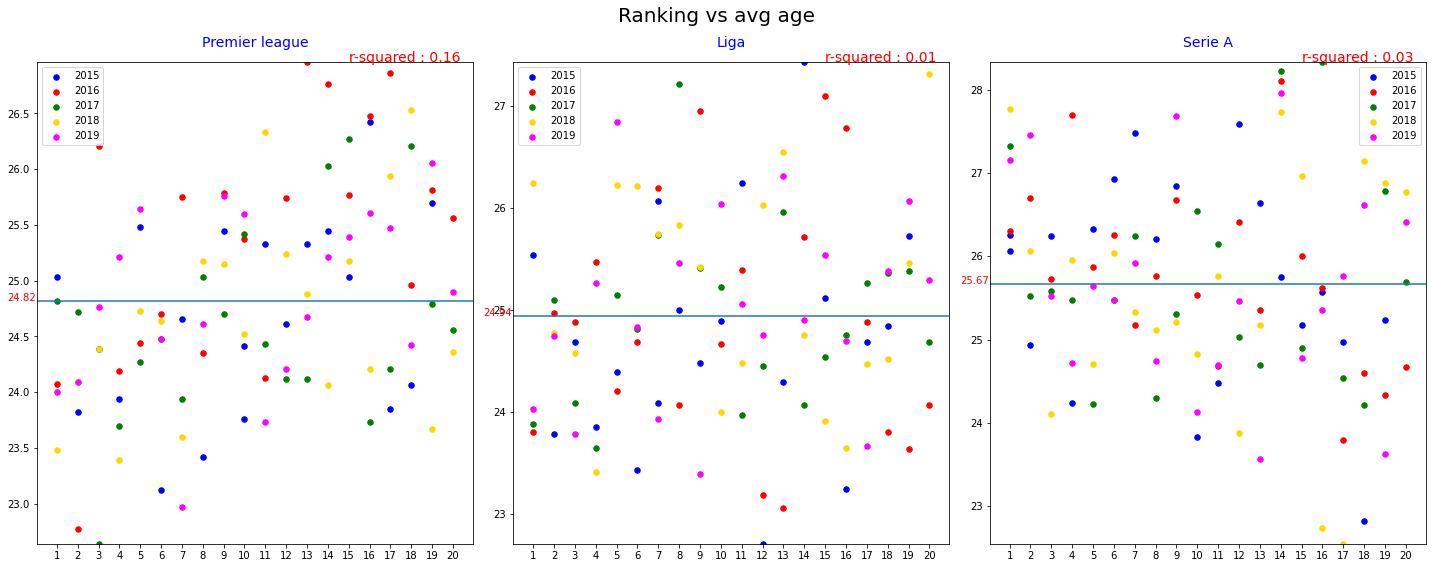

In [20]:
#not normalised
plot(list_dfs,"Ranking","avg age")

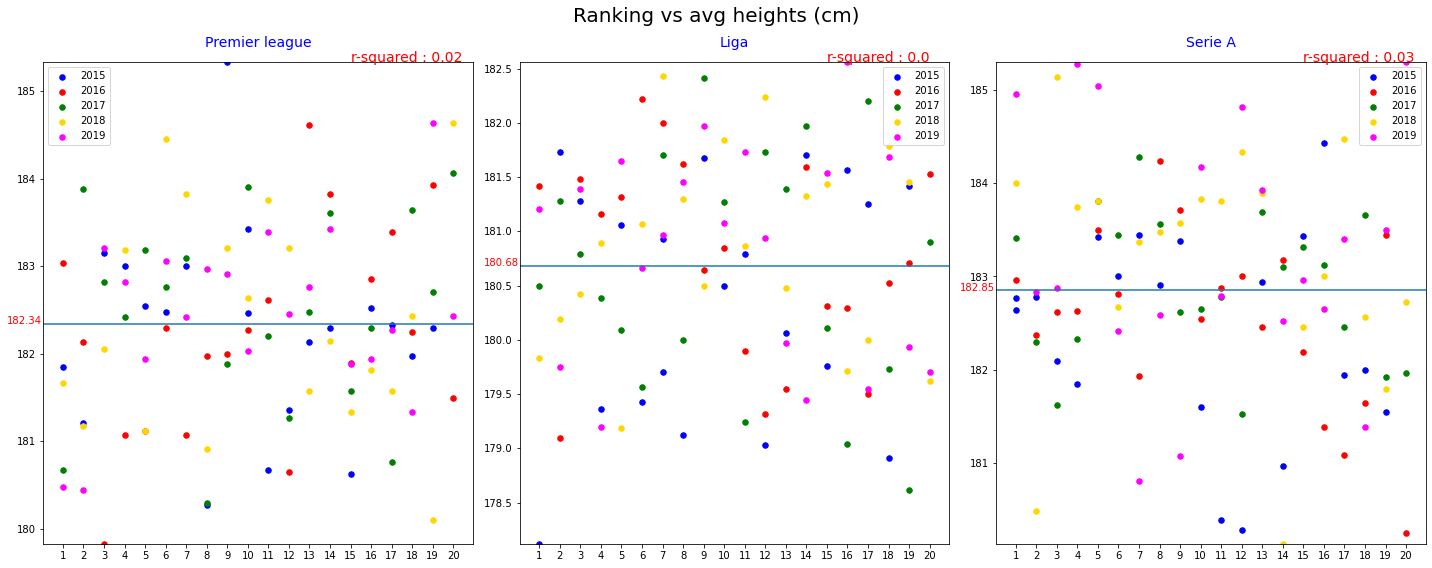

In [21]:
#not normalised
plot(list_dfs,"Ranking","avg heights (cm)")

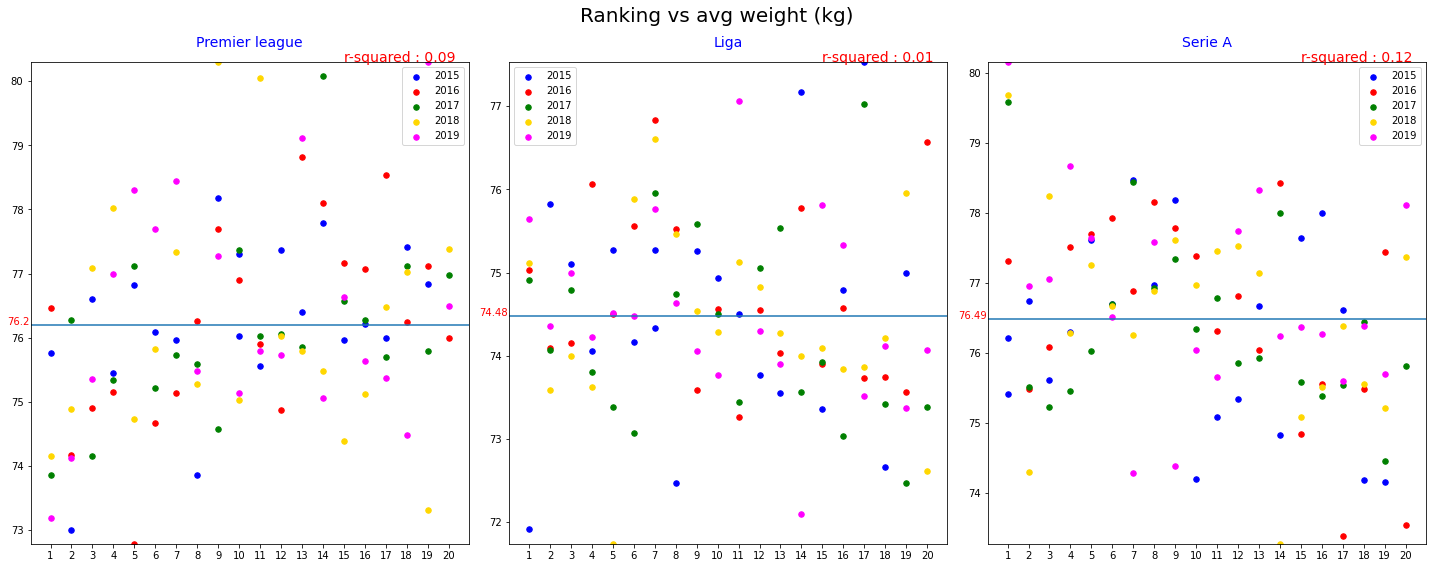

In [22]:
#not normalised
plot(list_dfs,"Ranking","avg weight (kg)")

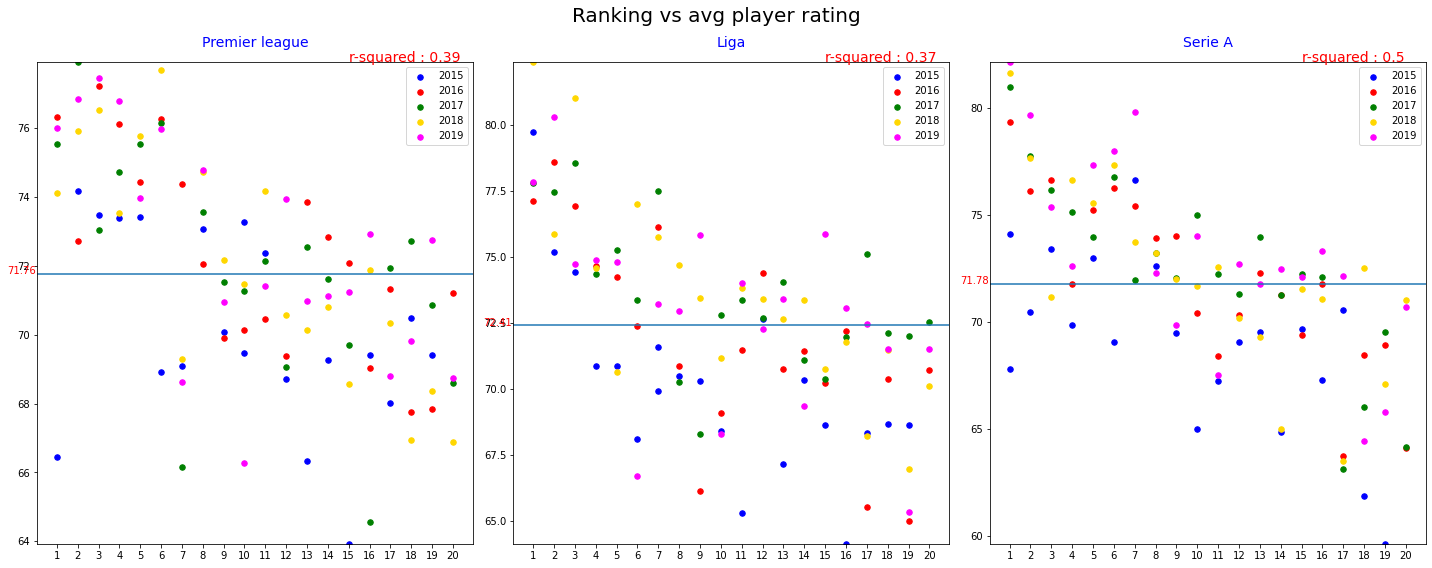

In [23]:
#not normalised
plot(list_dfs,"Ranking","avg player rating")

---Premier league---
Correlation = -0.8
p-value = 8.328102301390753e-19
----------------------------
---Liga---
Correlation = -0.7
p-value = 6.344889209140339e-13
----------------------------
---Serie A---
Correlation = -0.81
p-value = 8.690347698342293e-20
----------------------------


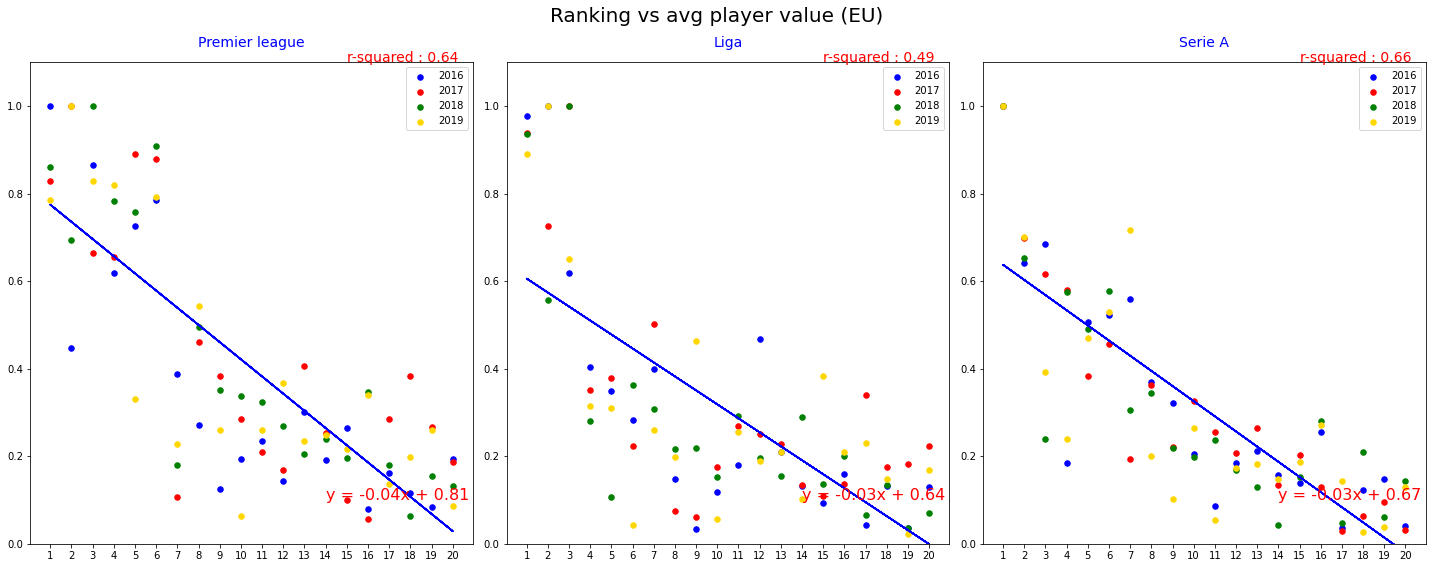

In [15]:
#normalised
plot(list_dfs,"Ranking","avg player value (EU)")

---Premier league---
Correlation = -0.76
p-value = 2.1698403574755604e-16
----------------------------
---Liga---
Correlation = -0.63
p-value = 3.9170994513140307e-10
----------------------------
---Serie A---
Correlation = -0.8
p-value = 8.063929420175678e-19
----------------------------


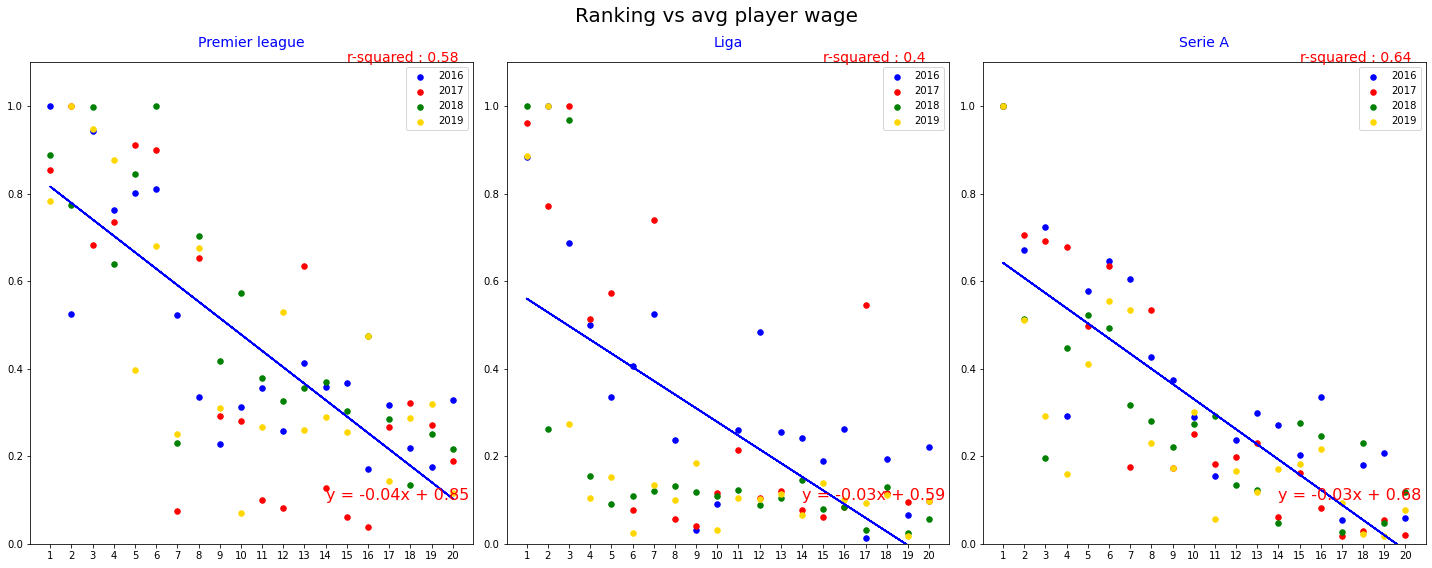

In [16]:
#normalised
plot(list_dfs,"Ranking","avg player wage")

---Premier league---
Correlation = 0.64
p-value = 2.3202789088321438e-10
----------------------------
---Liga---
Correlation = 0.58
p-value = 1.503693200891142e-08
----------------------------
---Serie A---
Correlation = 0.78
p-value = 1.2137179342084408e-17
----------------------------


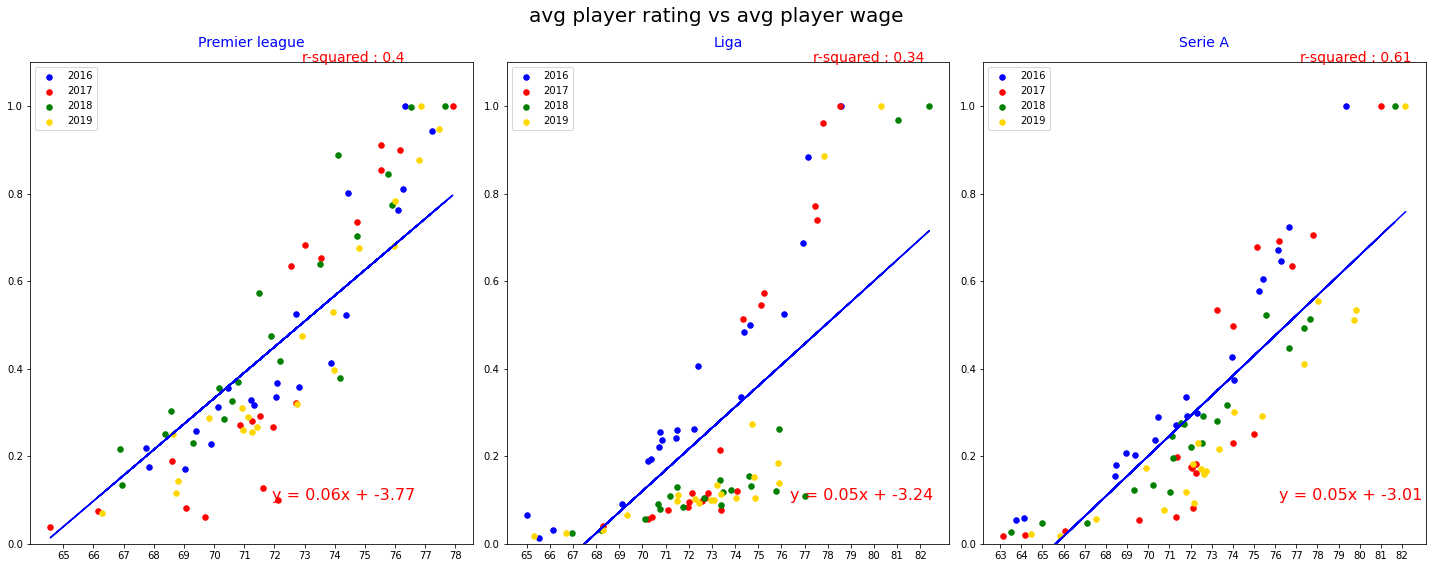

In [17]:
#normalised
plot(list_dfs,"avg player rating","avg player wage")

---Premier league---
Correlation = 0.67
p-value = 1.5378144587456644e-11
----------------------------
---Liga---
Correlation = 0.63
p-value = 3.1071786591303073e-10
----------------------------
---Serie A---
Correlation = 0.77
p-value = 5.1653579860896947e-17
----------------------------


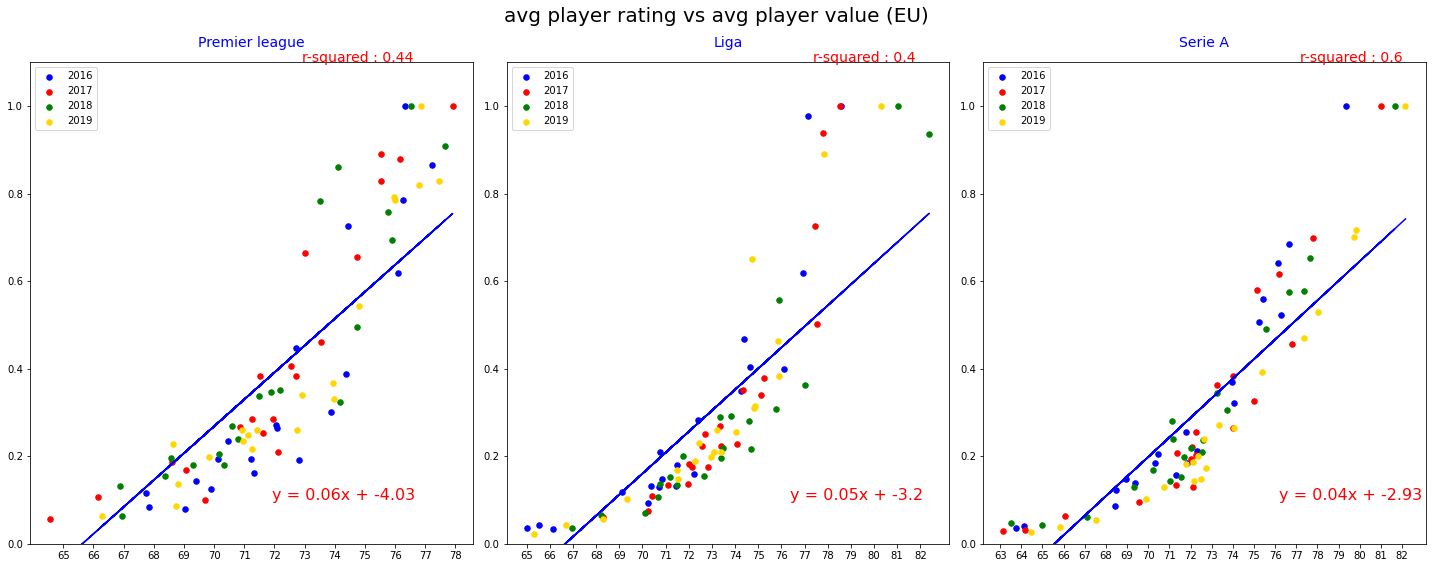

In [18]:
#normalised
plot(list_dfs,"avg player rating","avg player value (EU)")

[Observations]:

The 2 most important variables are the number of conceeded goals and then the number of scored goals.The top 4 conceeded between 18 and 21 goals where the average is between 27 and 29. The top 4 have an average goal between 48 and 50 where the average is around 34 for the league. we observe that a balanced decision is needed but that the defensive players will have an bigger impact on the season's result.

It seems obvious but the 3 following most important variables to build a winning team are the wage, the player's value and the talent you have in your team. The average player rating in the top 3 leagues in Europe is around 72 on a scale of 100. This mesure comes from the fifa rating that mesures each player skills and summarise with an overall rating. With some expetions in 2015 and one in 2018 we observe that none of the top 4 teams have an overal rating below 75. The wage, the value and the rating are strongly correlated. The better the player, the more expensive and the bigger the value.

Folowing this first observation we clearly see the better the player, the higher the wage and his value. So if we want to build a winning team knowing the needed average player ranking(75), we can prepare a team budget. (or with a defined budget we can try to build or winning team). Notice that the are big differences with an average in the top 4 in Italy around 50k, 66k in Englang and 74k in Spain. The average for the 3 leagues is between 27k and 37k for England.

Or last observation is that the age, height and weight averages don't explain the ranking. We can't find a real pattern here as the r-squared indicates the independance of the variable . But we see that the average age, height and weight in the top 4 is respectvely around 25 year, 180cm and 75kg.